# Task 2: Time Series Analysis

### Student Name: Edmond Agbaje

### Student Number: 19366741

#####  Stocks Chosen: JPMorgan Chase, Moderna Inc., Delta Air Lines, Amazon.com Inc.

This notebook characterise and visualise each time series daily, monthly and quarterly intervals.

In [1]:
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
import bs4
import pickle
import statistics as stat
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

Setting the colours for the various company stocks and other key settings for displays and plotting to be used.

In [2]:
#dictionary for the stock tickers 
company_ids = {"Amazon":"AMZN", "Delta Air Lines": "DAL", "JPMorgan": "JPM", "Moderna": "MRNA"}
stock_names = {0:"AMZN",1:"DAL",2:"JPM",3:"MRNA"}
#column names for data frames
columns = ["Open","High","Low","Close"]
# Precision that we'll use for Pandas display
pd.set_option('precision', 2)
# Colors that we will use in various plots
stock_colors = {"Amazon":"green", "Delta Air Lines":"darkred", "JPMorgan":"orange", "Moderna":"navy"}
# Default font size
fontsize = 13

# Data Loading 

Load the pickle files so we can analysis the time series.

In [3]:
#function to load the pickle files we've previously saved in task 1
def load_pkl(stock):
    fin = open(stock + ".pkl","rb")
    load = pickle.load(fin)
    fin.close
    print(stock+ ".pkl file has been loaded")
    return load

In [4]:
#loading the pickle files into a data frame
df_stocks = []
for stock in company_ids:
    df_stocks.append(load_pkl(stock))

Amazon.pkl file has been loaded
Delta Air Lines.pkl file has been loaded
JPMorgan.pkl file has been loaded
Moderna.pkl file has been loaded


Check that the files have been loaded correctly.

In [5]:
#display our stocks
for stock in stock_names:
    display(df_stocks[stock])

,Stock,Open,High,Low,Close
Date,,,,,
2019-10-01,AMZN,1746.00,1755.60,1728.41,1735.65
2019-10-02,AMZN,1727.74,1728.89,1705.00,1713.23
2019-10-03,AMZN,1713.00,1725.00,1685.06,1724.42
2019-10-04,AMZN,1726.02,1740.58,1719.23,1739.65
2019-10-07,AMZN,1731.63,1747.83,1723.70,1732.66
...,...,...,...,...,...
2021-09-24,AMZN,3402.01,3429.26,3393.40,3425.52
2021-09-27,AMZN,3371.50,3415.57,3339.61,3405.80
2021-09-28,AMZN,3357.71,3369.19,3290.10,3315.96


,Stock,Open,High,Low,Close
Date,,,,,
2019-10-01,DAL,58.05,58.68,56.65,57.01
2019-10-02,DAL,55.74,55.75,52.87,54.35
2019-10-03,DAL,53.12,53.86,51.81,52.83
2019-10-04,DAL,52.85,53.96,52.68,53.81
2019-10-07,DAL,53.75,54.11,53.24,53.36
...,...,...,...,...,...
2021-09-24,DAL,42.84,43.74,42.67,43.53
2021-09-27,DAL,43.90,45.06,43.75,43.78
2021-09-28,DAL,43.66,44.21,43.31,43.44


,Stock,Open,High,Low,Close
Date,,,,,
2019-10-01,JPM,118.40,119.00,115.41,115.55
2019-10-02,JPM,114.81,114.90,112.93,113.25
2019-10-03,JPM,112.27,112.91,110.52,112.19
2019-10-04,JPM,112.34,114.94,112.27,114.62
2019-10-07,JPM,112.70,114.00,111.97,113.22
...,...,...,...,...,...
2021-09-24,JPM,161.44,163.59,160.82,163.04
2021-09-27,JPM,165.00,167.40,164.61,166.98
2021-09-28,JPM,167.70,169.30,165.66,166.08


,Stock,Open,High,Low,Close
Date,,,,,
2019-10-01,MRNA,15.87,16.06,14.80,14.81
2019-10-02,MRNA,14.78,15.01,14.42,14.86
2019-10-03,MRNA,15.24,15.24,14.41,15.07
2019-10-04,MRNA,15.05,15.57,14.89,15.51
2019-10-07,MRNA,15.45,15.63,15.07,15.47
...,...,...,...,...,...
2021-09-24,MRNA,448.08,453.61,426.61,430.14
2021-09-27,MRNA,430.60,434.00,407.26,408.84
2021-09-28,MRNA,398.56,403.30,376.03,384.21


# Stocks Analysis

We will now characterise each of our time series individually at daily,monthly and quaterly intervals.

Firstly, we will look at the Open,High,Low and Close Stock prices of each company stock over the given time frame.

We will compare them graphically too see how each of them vary over time.

In [6]:
#to be used when we want to reference a specific stock later on
AMZN_stock = df_stocks[0]
DAL_stock = df_stocks[1]
JPM_stock = df_stocks[2]
MRNA_stock = df_stocks[3]

#### Daily Stock Analysis

Let's have a look at Amazon's daily stock trend over from 1/10/2019 to 30/9/2021.

Text(0.5, 0, 'Date')

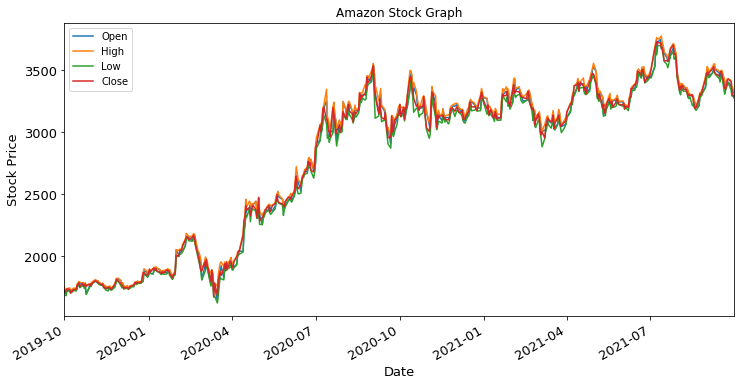

In [7]:
ax=AMZN_stock.plot(figsize=(12,6),fontsize=fontsize,title="Amazon Stock Graph",xlim =["2019-10-01","2021-09-30"])
ax.set_ylabel("Stock Price",fontsize=fontsize)
ax.set_xlabel("Date",fontsize=fontsize)

We see that Amazon's stock over this time period tended to continually rise over the time frame from under 2000 originally to now over 3500.

Let's now see how Amazon stocks compare with the others daily stocks over the same time frame.

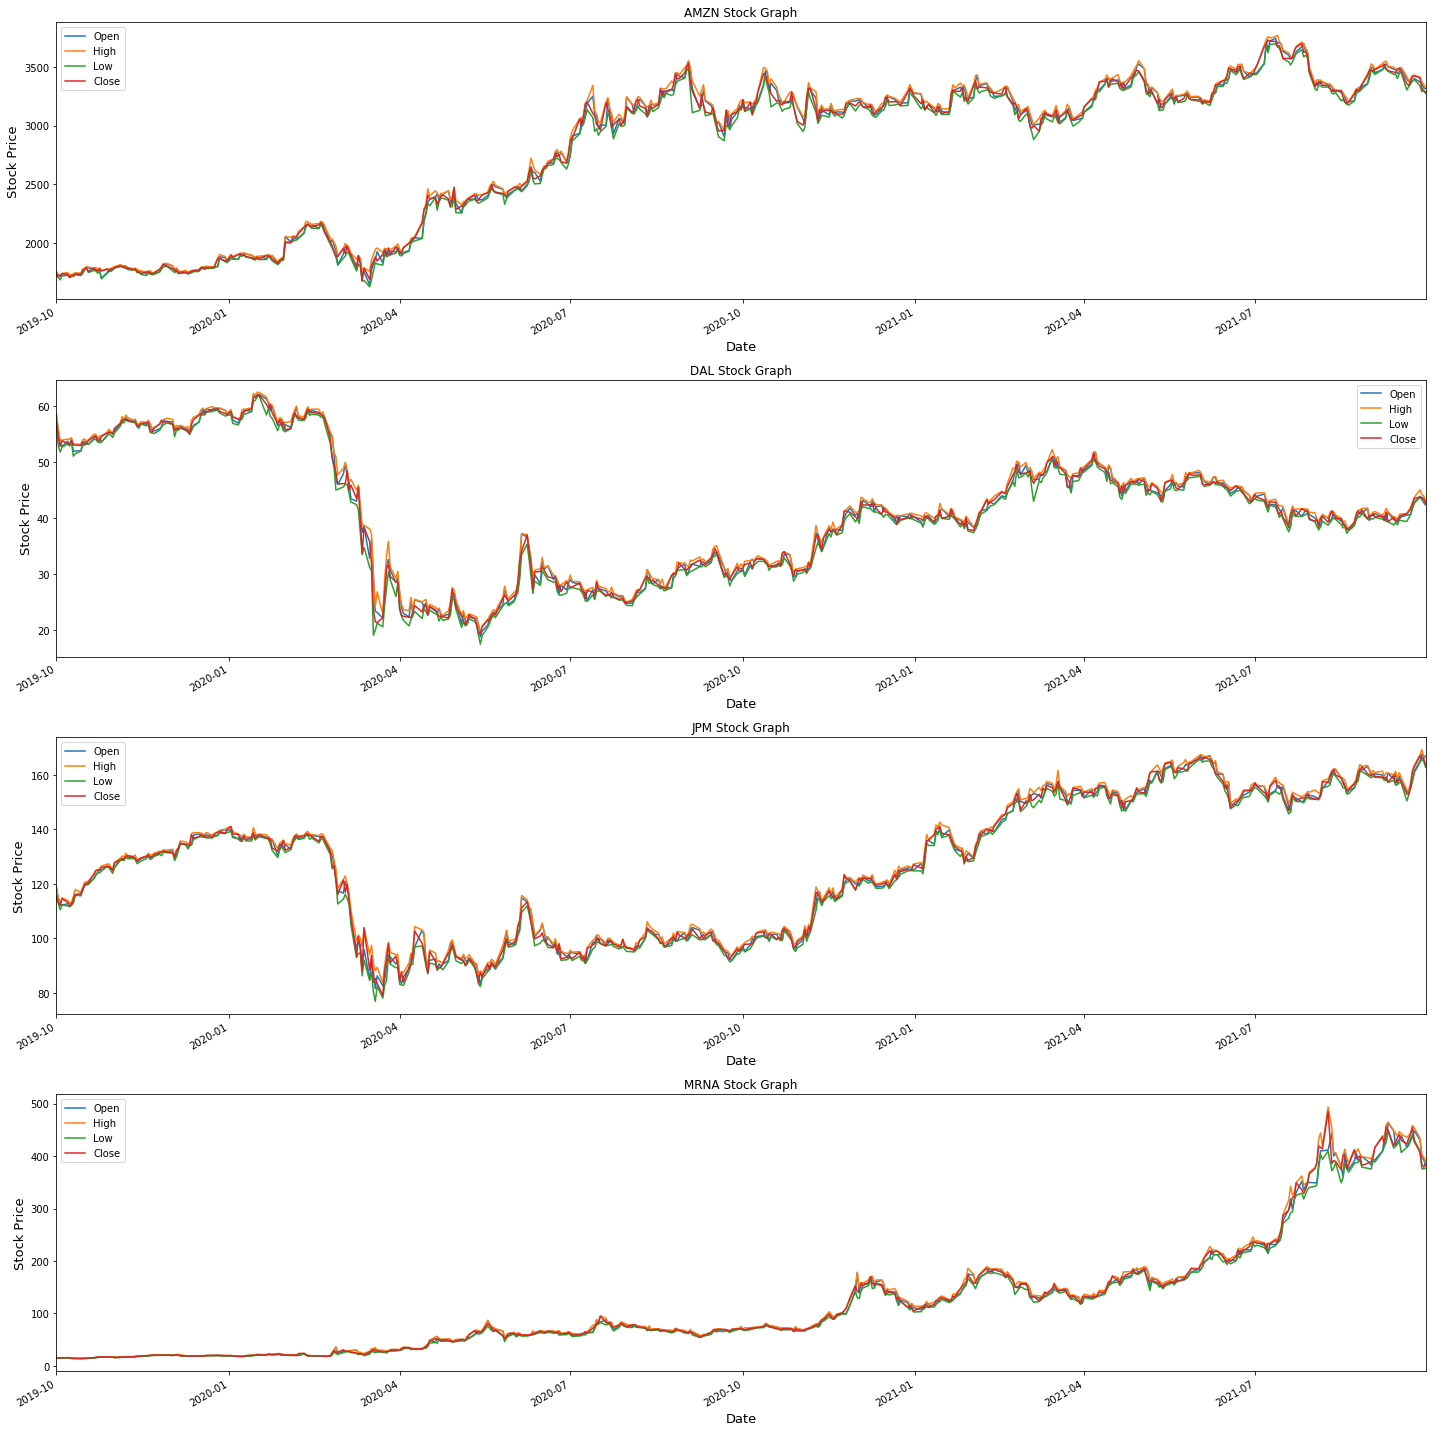

In [8]:
fig = plt.figure(figsize=(20,20))
for i, stock in enumerate(stock_names):
    axc = fig.add_subplot(4, 1, i+1)
    ax = df_stocks[stock].plot(ax=axc)
    ax.set_title("%s Stock Graph" % stock_names[stock])
    ax.set_ylabel("Stock Price",fontsize=fontsize)
    ax.set_xlabel("Date",fontsize=fontsize)
    # note that we will use consistent Y-axis limits based on the ranges we computed above
    #ax.set_ylim(0, df_open_stats["Max"].max()+2)
    ax.set_xlim(["2019-10-01","2021-09-30"])
    # change the format of the dates on the x-axis 
# fix the spacing between plots
fig.tight_layout()

We can now analyse the daily of our chosen companies and see the different trends based on the flow of the graphs above.

We see with the Delta Air Line stock that it took a big drop in early 2020 and it is now gradually starting to rise again. This fall in stock price could be due to the COVID-19 Pandemic and as Delta is an Airlines Company, not many people could fly at the time due the global pandemic at the time and is gradually rising again as we come out of lockdown and things are resuming back to normal.

Looking at the JPMorgan stock we can see that its stock also fell drastically around the same time as Delta Air Line. This could also be due to the COVID-19 pandemic which would have affected banking and financial companies at the time. We see that the stock prices have risen since then however.

Finally, analysing the Moderna stock we see a quite oppostie effect compared to the other companies. We see that the Moderna Stock has, in general, been continually rising over this time period. This is clearly down to the COVID-19 pandemic also and the creation of the COVID-19 vaccine which would've resulted in their stock prices increasing.

It is interesting to see the difference in stock trends of the various companies over this time period. We see how Airline and Financial sectors saw drops in stock prices while pharamaceutical companies had an opposite trend over the time period.

Now we will look at how the Daily Open,High,Low and Closing Stocks of each company compare. 

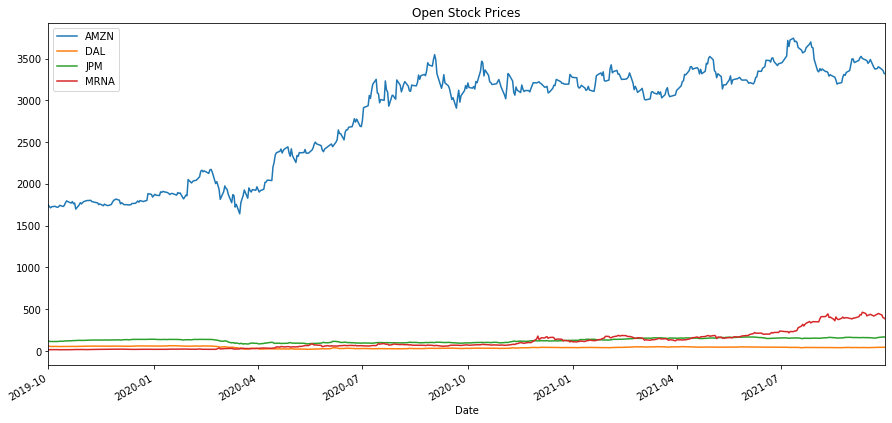

In [9]:
AMZN_stock["Open"].plot(label="AMZN",figsize = (15,7))
DAL_stock["Open"].plot(label="DAL")
JPM_stock["Open"].plot(label="JPM")
MRNA_stock["Open"].plot(label="MRNA")
plt.title("Open Stock Prices")
plt.legend()

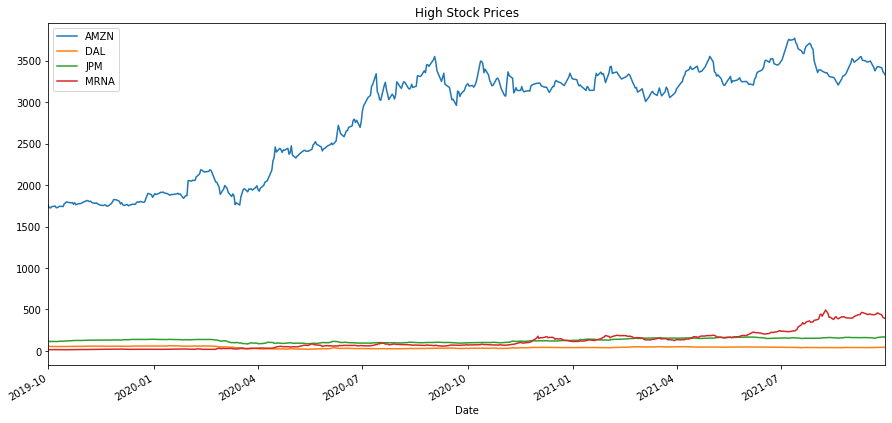

In [10]:
AMZN_stock["High"].plot(label="AMZN",figsize = (15,7))
DAL_stock["High"].plot(label="DAL")
JPM_stock["High"].plot(label="JPM")
MRNA_stock["High"].plot(label="MRNA")
plt.title("High Stock Prices")
plt.legend()

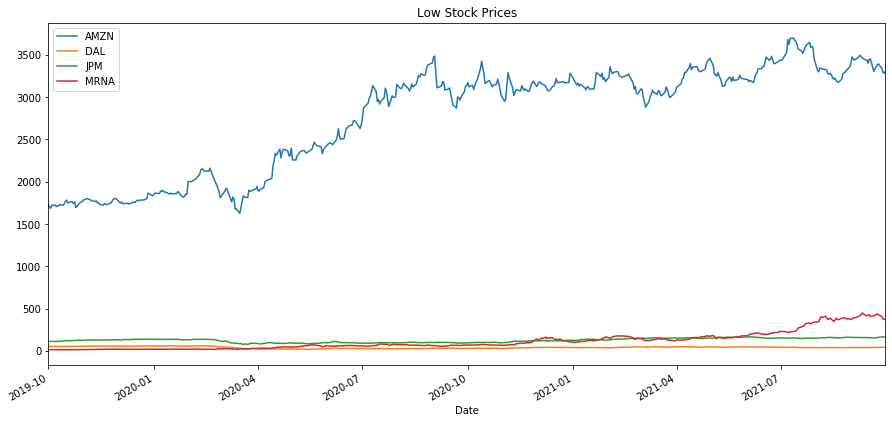

In [11]:
AMZN_stock["Low"].plot(label="AMZN",figsize = (15,7))
DAL_stock["Low"].plot(label="DAL")
JPM_stock["Low"].plot(label="JPM")
MRNA_stock["Low"].plot(label="MRNA")
plt.title("Low Stock Prices")
plt.legend()

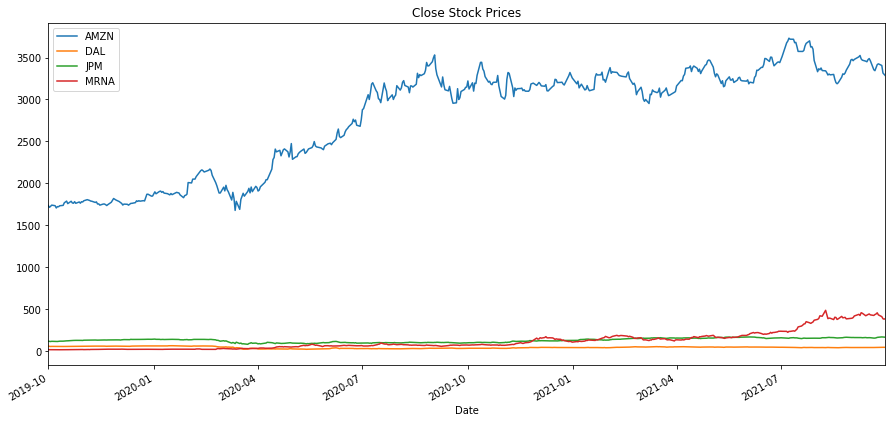

In [12]:
AMZN_stock["Close"].plot(label="AMZN",figsize = (15,7))
DAL_stock["Close"].plot(label="DAL")
JPM_stock["Close"].plot(label="JPM")
MRNA_stock["Close"].plot(label="MRNA")
plt.title("Close Stock Prices")
plt.legend()

Compute the min, max, mean, median and standard deviation of the different columns in the dataset for each company.

In [13]:
#function that computes various stats
def compute_stats(col_name):
    rows = []
    for stock in stock_names:
        row = {"Stock": stock_names[stock]}
        row["Min"] = df_stocks[stock][col_name].min()
        row["Max"] = df_stocks[stock][col_name].max()
        row["Mean"] = df_stocks[stock][col_name].mean()
        row["Median"] = df_stocks[stock][col_name].median()
        row["Standard Dev."] = stat.stdev(df_stocks[stock][col_name])
        rows.append(row)
    return pd.DataFrame(rows).set_index("Stock")

Let's see an example of this table for Open Stocks of each company.

In [14]:
df_open_stats = compute_stats("Open")
df_open_stats

,Min,Max,Mean,Median,Standard Dev.
Stock,,,,,
AMZN,1641.51,3744.00,2803.44,3122.00,636.26
DAL,18.80,62.13,41.00,41.01,10.99
JPM,81.56,167.70,126.44,129.77,24.85
MRNA,13.93,463.16,119.54,73.61,111.52


We see how these stats compare for each company and we can illustrate this graphically for all the columns in the dataset for each company.

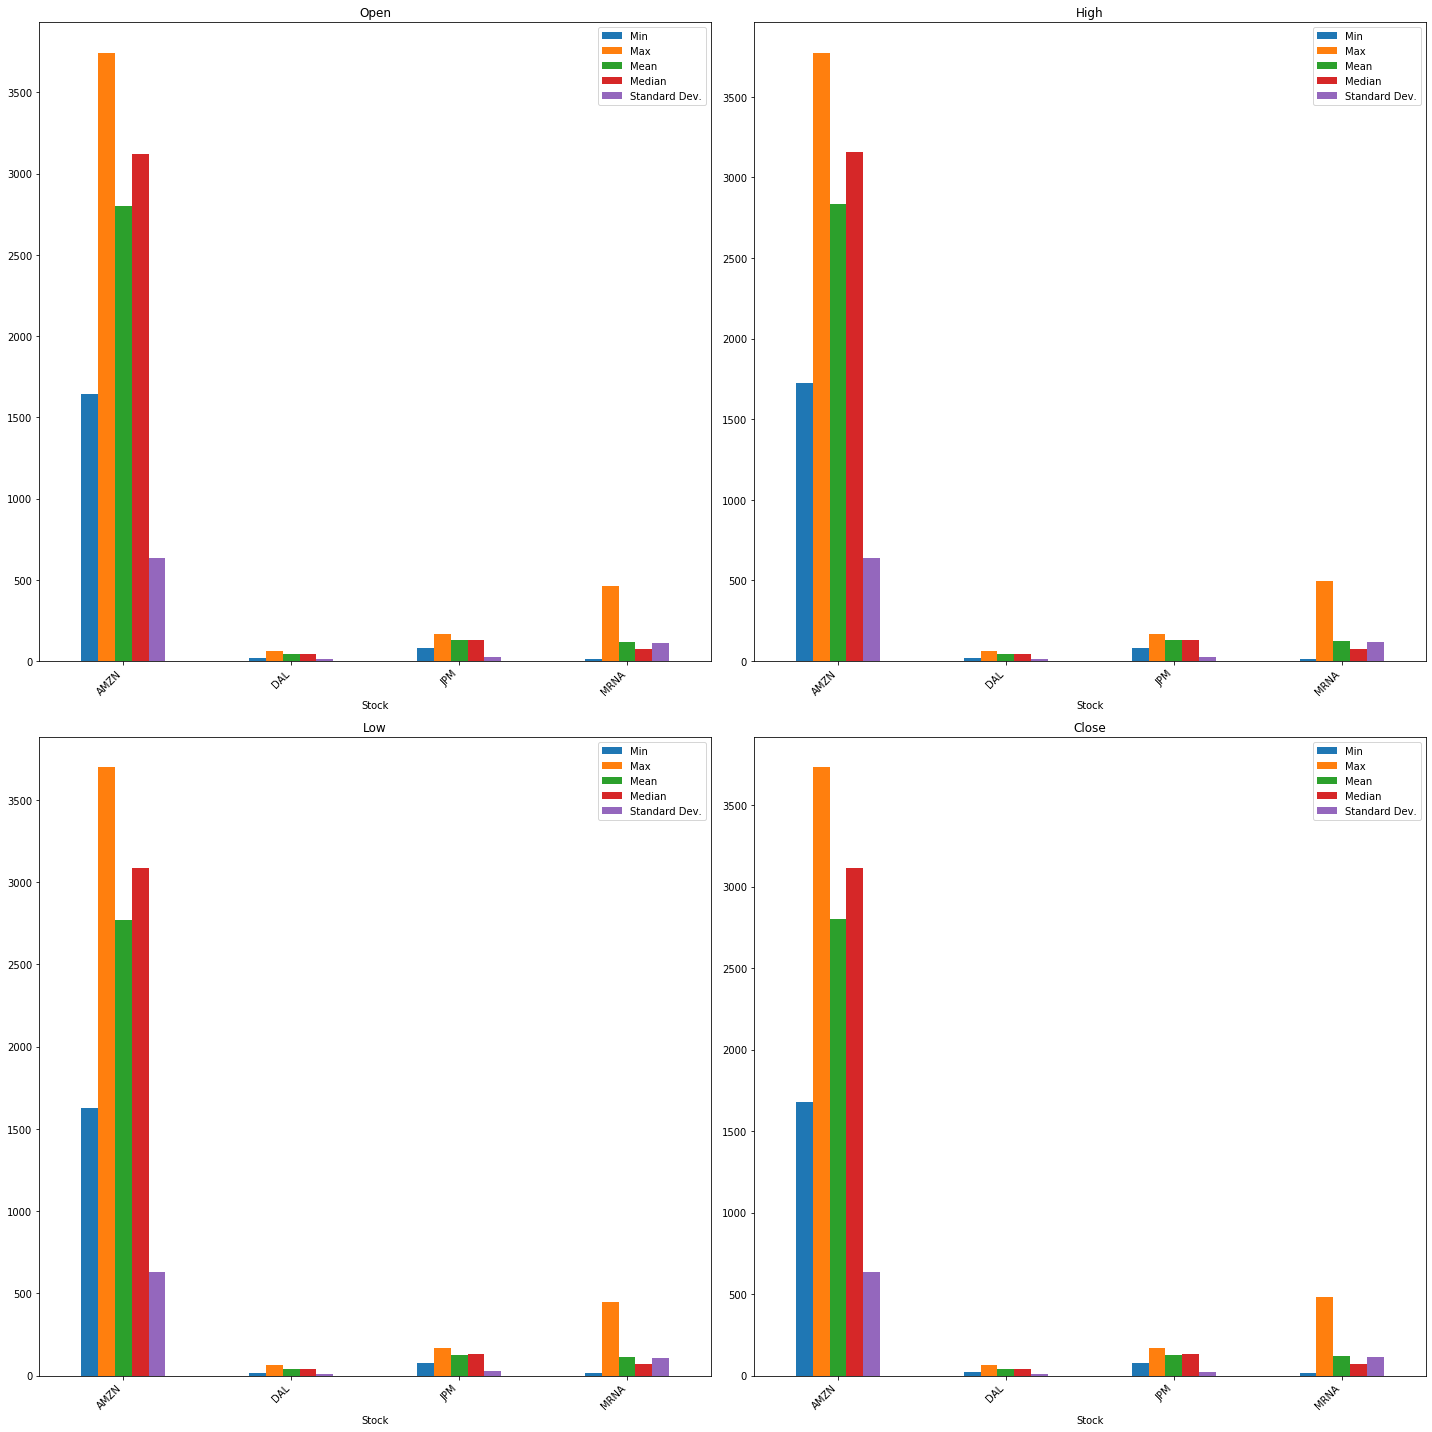

In [15]:
fig = plt.figure(figsize=(20,20))
for i,col in enumerate(columns):
    axc = fig.add_subplot(2,2,i+1)
    ax = compute_stats(col).plot.bar(ax=axc)
    ax.set_title("%s"%col)
    plt.xticks(rotation=45,ha="right")
fig.tight_layout()

We see Amazon's stock prices are significantly larger than the rest with a greater min,max,mean,median and standard devation than the other companies we are analysing.

Let's just take a look at the Max of each column for each stock.

In [16]:
def compute_max(col_name):
    rows = []
    for stock in stock_names:
        row = {"Stock": stock_names[stock]}
        row["Max"] = df_stocks[stock][col_name].max()
        rows.append(row)
    return pd.DataFrame(rows).set_index("Stock")

In [17]:
maxdf = compute_max("High")
maxdf

,Max
Stock,
AMZN,3773.08
DAL,62.48
JPM,169.30
MRNA,493.76


We can see how high Amazon's Highest stock reached compared to the other companies.

### Scatter Plot Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174EEF4F3C8>,
      dtype=object)

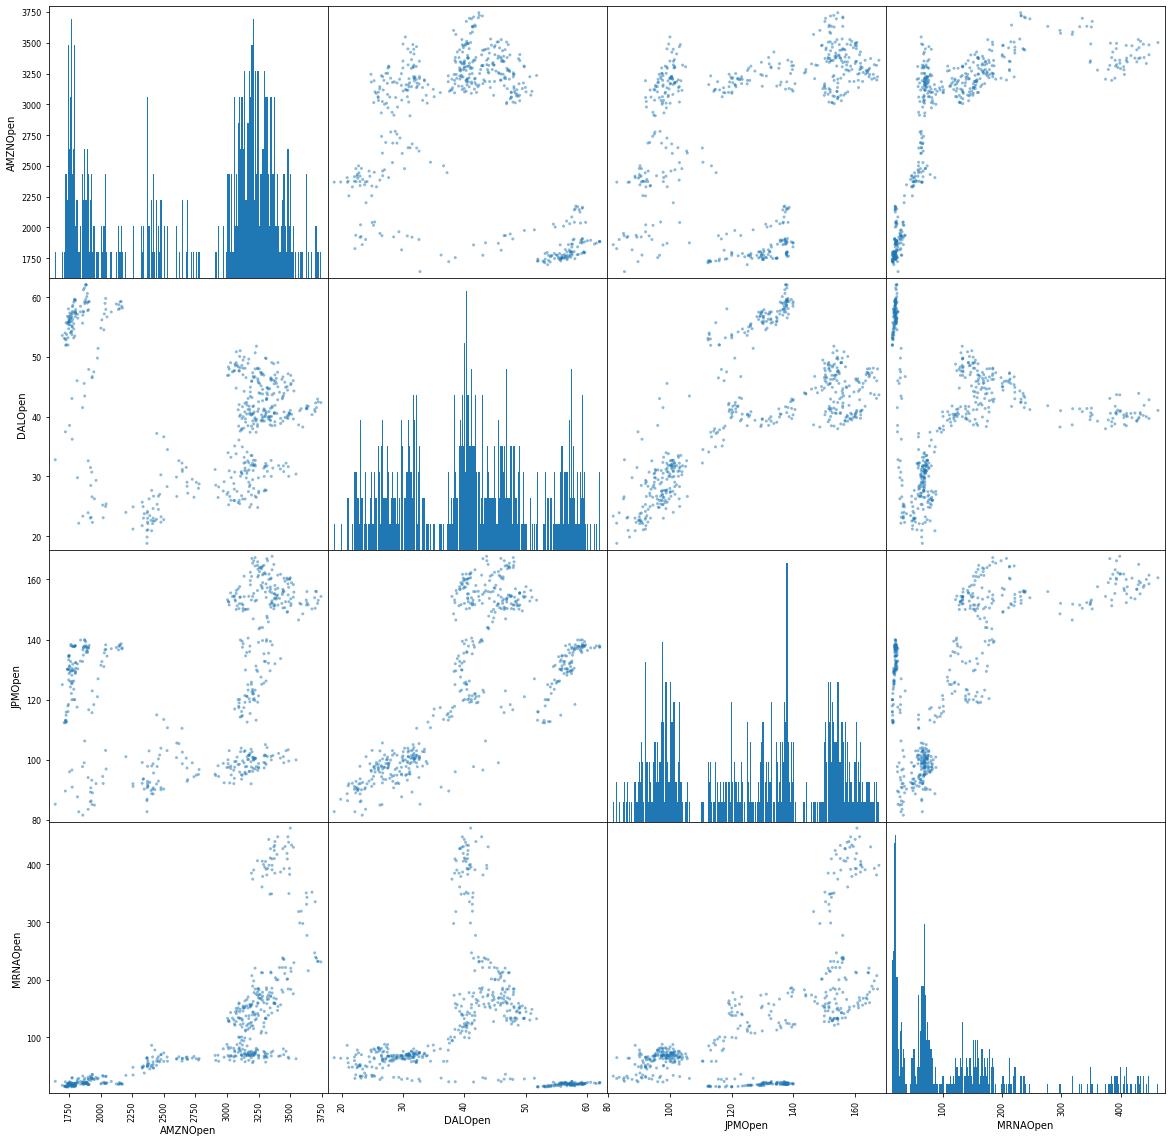

In [18]:
data = pd.concat([AMZN_stock["Open"],DAL_stock["Open"],JPM_stock["Open"],MRNA_stock["Open"]],axis=1)
data.columns = ['AMZNOpen','DALOpen','JPMOpen','MRNAOpen']
scatter_matrix(data, figsize = (20,20), hist_kwds= {'bins':250})

The above graph is the combination of histograms for each company and a subsequent scattered plot taking two companies’ stocks at a time. 

This kind of grahical representation will shopw uas if there are any simliarities/correlation in the daily opening stocks of the companys we are looking at here.

From the graph, we can see that there is a loose linear correlation between the stocks of JPM,DAL and MRNA. This could possibly be down to them showing similar trends in their graphs.

In [19]:
def plot_heatmap(title, df_in, figsize=(20, 5)):
    df_corr = df_in.corr()
    # create a color palettte
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # display the heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df_corr, square=True, cbar=False,
                annot=True, cmap=cmap, linewidths=0.5, vmin=-1)
    ax.set_title(title)

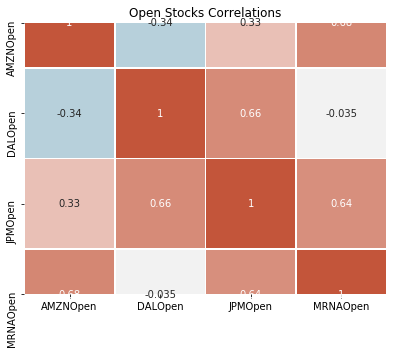

In [20]:
plot_heatmap("Open Stocks Correlations", data)

This heatmap further illustrates the correlation that we are talking about.

### Volatility of Stocks

A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.

So we will calculate the percentage increase in the stocks to analyse the volatility of each companies' stock.

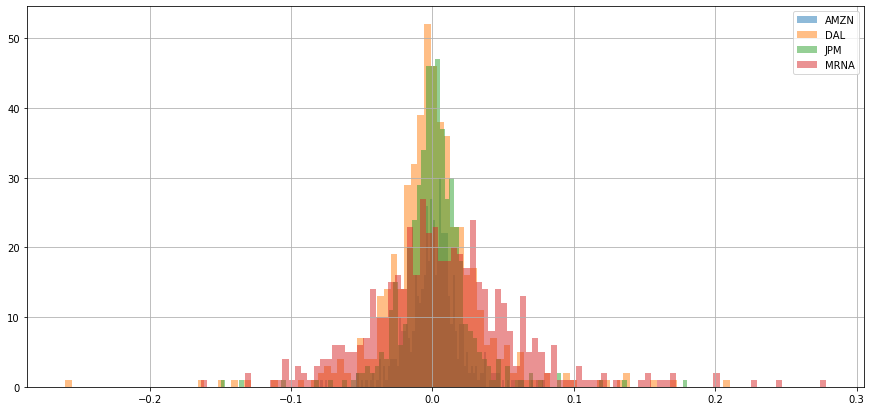

In [21]:
AMZN_stock['returns'] = (AMZN_stock['Close']/AMZN_stock['Close'].shift(1)) -1
DAL_stock['returns'] = (DAL_stock['Close']/DAL_stock['Close'].shift(1))-1
JPM_stock['returns'] = (JPM_stock['Close']/JPM_stock['Close'].shift(1)) - 1
MRNA_stock['returns'] = (MRNA_stock['Close']/MRNA_stock['Close'].shift(1)) - 1
AMZN_stock['returns'].hist(bins = 100, label = 'AMZN', alpha = 0.5, figsize = (15,7))
DAL_stock['returns'].hist(bins = 100, label = 'DAL', alpha = 0.5)
JPM_stock['returns'].hist(bins = 100, label = 'JPM', alpha = 0.5)
MRNA_stock['returns'].hist(bins = 100, label = 'MRNA', alpha = 0.5)
plt.legend()

It is clear from the graph that the percentage increase in stock price histogram for MRNA is the widest which indicates the stock of MRNA is the most volatile among the four companies compared.

This would be expected as MRNA had a massive rise in stock prices over this time frame given. This could potentially be due to it drastic rise in stock prices over this time frame due to COVID-19 and the creation of their vaccine which would dramatically increase their stock prices between 2019 and 2021.

### Similar Stocks

Let's look at which companies where most similar to each other based on there stocks.

We look at the similarity of stocks here based on their Open stock stats that we computed earlier.

In [22]:
#measure similarity using Euclidean Distance
d = euclidean_distances(df_open_stats)
d

array([[   0.        , 5805.50675871, 5631.78227552, 5494.02491042],
       [5805.50675871,    0.        ,  174.5115786 ,  422.1202978 ],
       [5631.78227552,  174.5115786 ,    0.        ,  320.28464044],
       [5494.02491042,  422.1202978 ,  320.28464044,    0.        ]])

In [23]:
print("\033[1m"  + "Stock Profiles")
print("-----------------------------")
print('\033[0m')
for i, stock in enumerate(stock_names):
    dmin, dmax = 0, 0
    pos_min, pos_max = None, None
    for j in range(len(stock_names)):
        # skip the diagonal
        if i == j:
            continue
        if pos_min is None or d[i,j] < dmin:
            dmin = d[i,j]
            pos_min = stock_names[j]
        if pos_max is None or d[i,j] > dmax:
            dmax = d[i,j]
            pos_max = stock_names[j]  
    print("%s:\t Most similar to %s, least similar to %s" % (stock_names[stock], pos_min, pos_max))

Stock Profiles
-----------------------------

AMZN:	 Most similar to MRNA, least similar to DAL
DAL:	 Most similar to JPM, least similar to AMZN
JPM:	 Most similar to DAL, least similar to AMZN
MRNA:	 Most similar to JPM, least similar to AMZN


We that all the stocks are least similar to Amazon as there's such a difference in their stock prices.

We also see that DAL and JPM are most similar to each other. This is as expected as both of these company stocks seemed to be affected in a similar way, presumably as a result of the COVID-19 Pandemic.

#### Monthly Stocks Analysis

We will now analyse the data based on monthly averages.

In [24]:
#to be used when we want to reference a specific stock later on
AMZN_stock1 = df_stocks[0].resample("M").mean()
DAL_stock1 = df_stocks[1].resample("M").mean()
JPM_stock1 = df_stocks[2].resample("M").mean()
MRNA_stock1 = df_stocks[3].resample("M").mean()

In [25]:
AMZN_stock1

,Open,High,Low,Close,returns
Date,,,,,
2019-10-31,1749.14,1763.67,1736.60,1752.33,1.11e-03
2019-11-30,1774.93,1784.15,1764.34,1774.22,7.08e-04
2019-12-31,1786.52,1797.46,1774.06,1785.82,1.29e-03
2020-01-31,1886.26,1897.95,1869.81,1883.52,4.16e-03
2020-02-29,2064.51,2093.07,2042.33,2064.02,-3.23e-03
2020-03-31,1866.23,1913.11,1825.88,1872.96,2.37e-03
2020-04-30,2216.48,2258.59,2186.93,2231.16,1.17e-02
2020-05-31,2392.67,2421.00,2364.09,2394.06,-4.27e-04
2020-06-30,2607.94,2642.30,2579.43,2613.65,5.67e-03


Let's look at Amazons stock based on monthly averages.

Text(0.5, 0, 'Date')

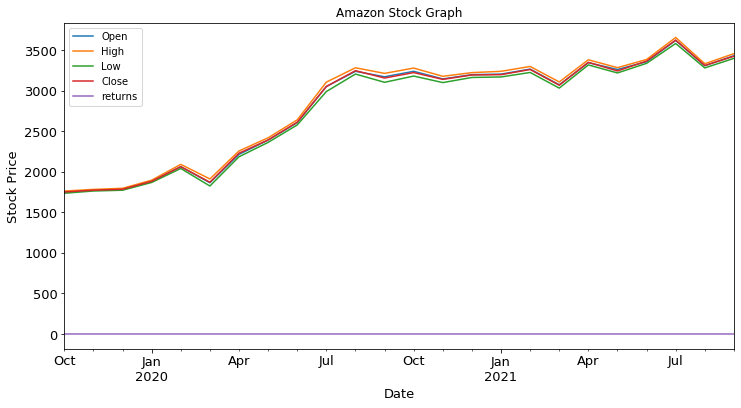

In [26]:
ax=AMZN_stock1.plot(figsize=(12,6),fontsize=fontsize,title="Amazon Stock Graph",xlim =["2019-10-01","2021-09-30"])
ax.set_ylabel("Stock Price",fontsize=fontsize)
ax.set_xlabel("Date",fontsize=fontsize)

We that there is a much smooter trend in the graph as expected as we are now working with monthly averages.

Let's see how the other company stocks look after being resampled.

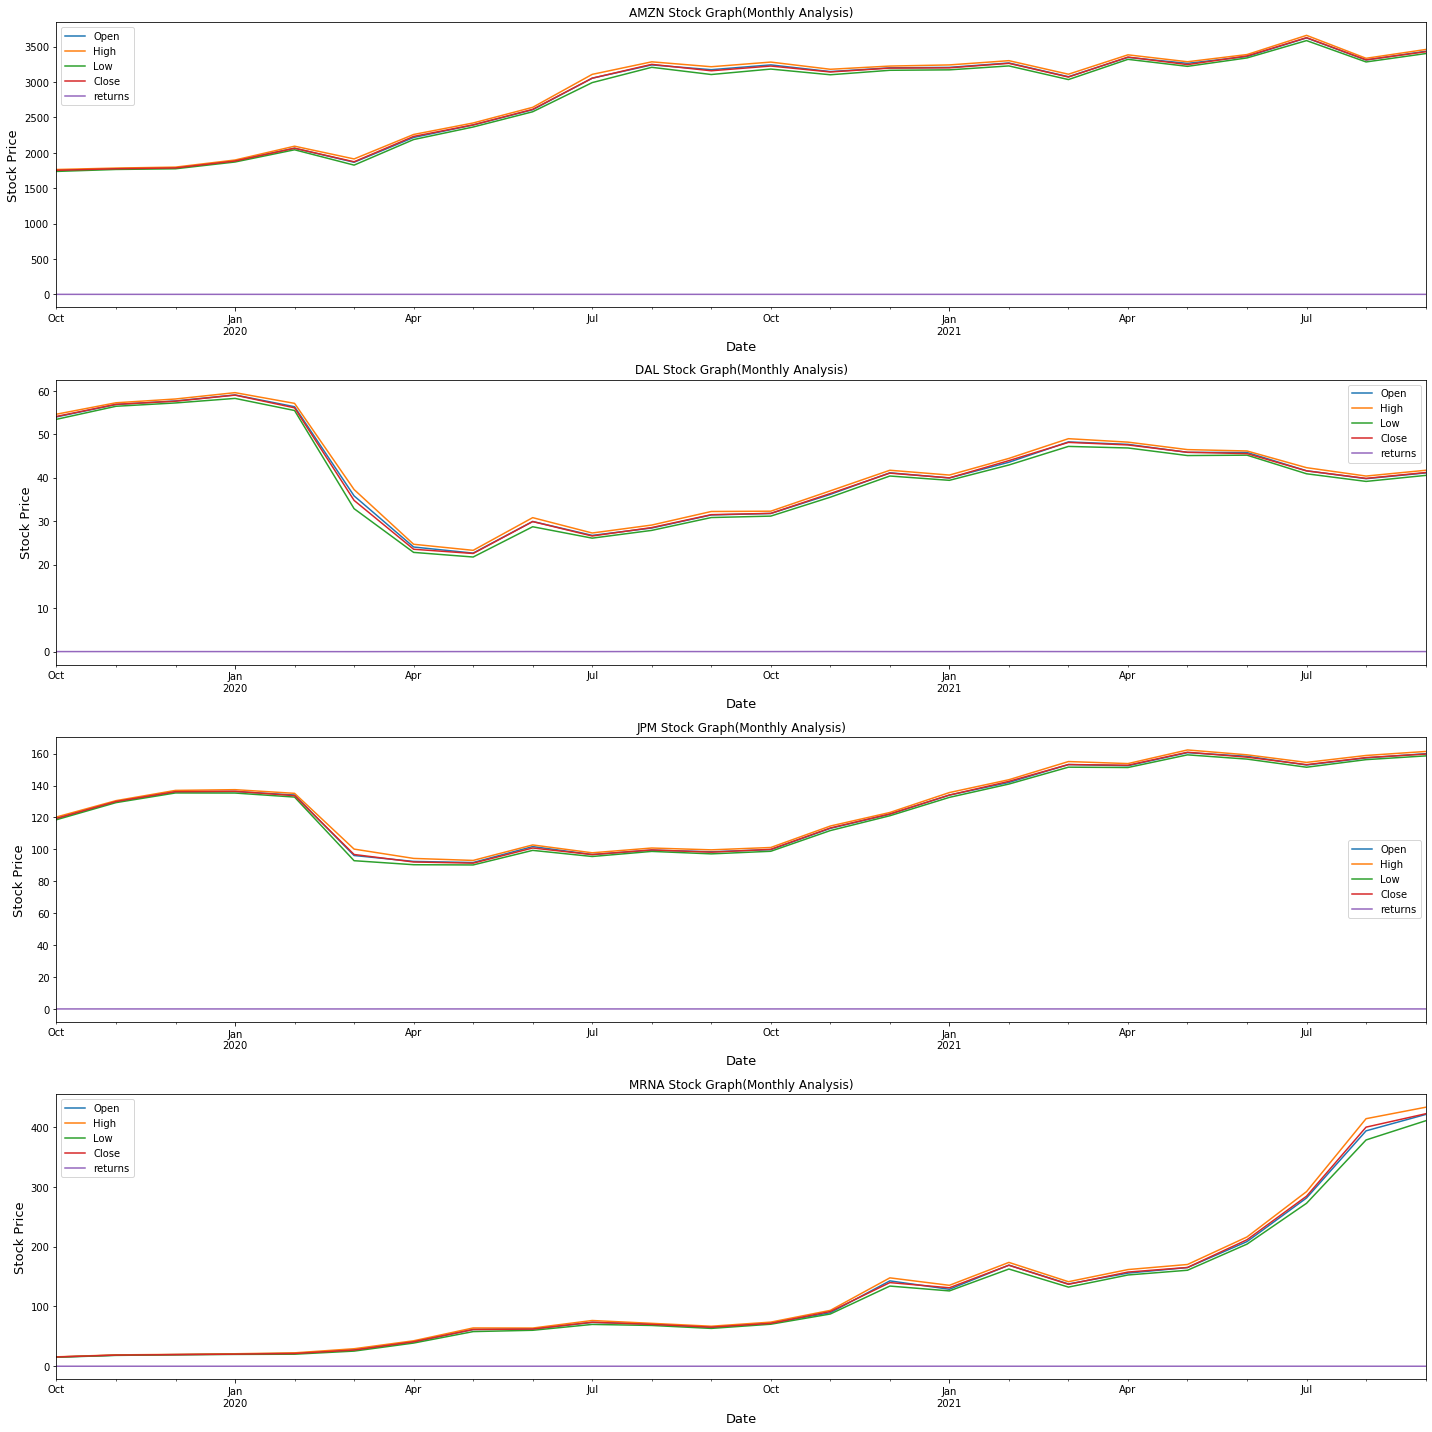

In [27]:
fig = plt.figure(figsize=(20,20))
for i, stock in enumerate(stock_names):
    axc = fig.add_subplot(4, 1, i+1)
    ax = df_stocks[stock].resample("M").mean().plot(ax=axc)
    ax.set_title("%s Stock Graph(Monthly Analysis)" % stock_names[stock])
    ax.set_ylabel("Stock Price",fontsize=fontsize)
    ax.set_xlabel("Date",fontsize=fontsize)
    # note that we will use consistent Y-axis limits based on the ranges we computed above
    #ax.set_ylim(0, df_open_stats["Max"].max()+2)
    ax.set_xlim(["2019-10-01","2021-09-30"])
    # change the format of the dates on the x-axis 
# fix the spacing between plots
fig.tight_layout()

We see that all the graphs have much smooter looks to them with less dramatic peaks and trough. We can still see the drastic dip in DAL stocks and the consistent dramatic rise in the MRNA stock.

We still see that AMZN are rising also however JPM stock looks less dramtic than its daily graph, but still highlights the drop in stock price around April 2020.

Now we will look at how the monthly averages of Open,High,Low and Close compare for each company.

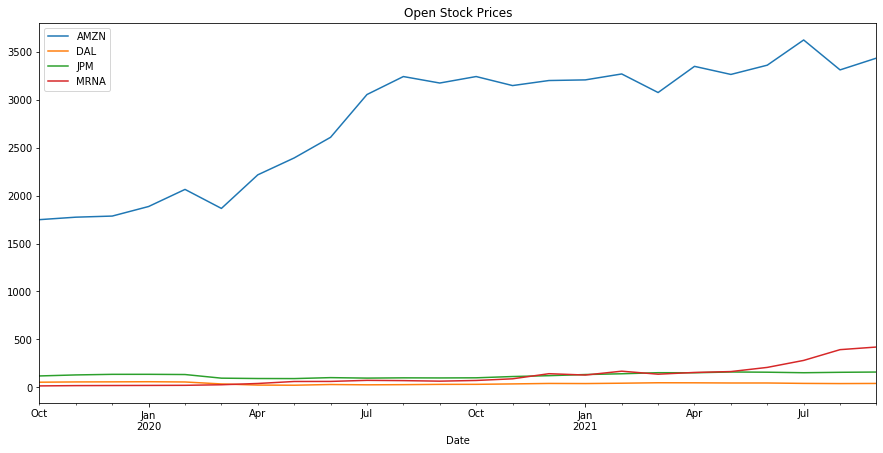

In [28]:
AMZN_stock1["Open"].plot(label="AMZN",figsize = (15,7))
DAL_stock1["Open"].plot(label="DAL")
JPM_stock1["Open"].plot(label="JPM")
MRNA_stock1["Open"].plot(label="MRNA")
plt.title("Open Stock Prices")
plt.legend()

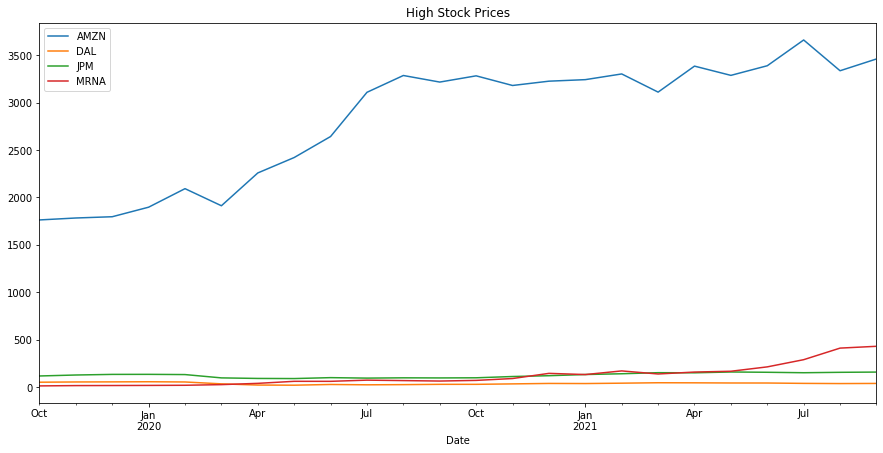

In [29]:
AMZN_stock1["High"].plot(label="AMZN",figsize = (15,7))
DAL_stock1["High"].plot(label="DAL")
JPM_stock1["High"].plot(label="JPM")
MRNA_stock1["High"].plot(label="MRNA")
plt.title("High Stock Prices")
plt.legend()

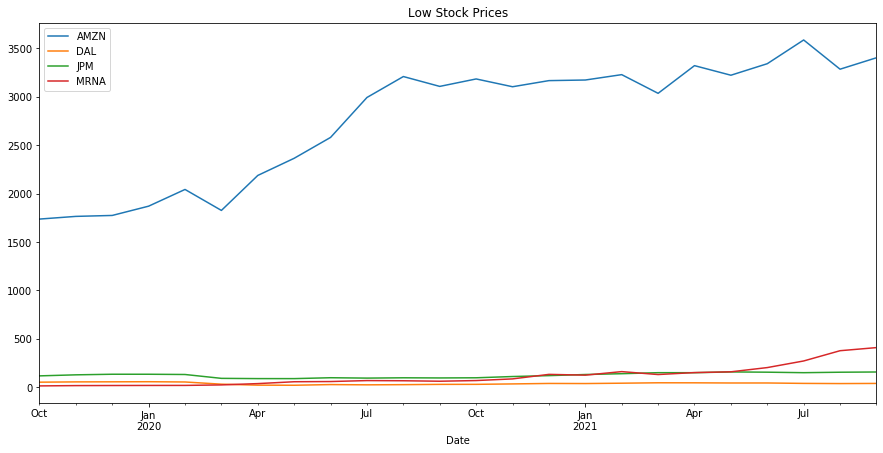

In [30]:
AMZN_stock1["Low"].plot(label="AMZN",figsize = (15,7))
DAL_stock1["Low"].plot(label="DAL")
JPM_stock1["Low"].plot(label="JPM")
MRNA_stock1["Low"].plot(label="MRNA")
plt.title("Low Stock Prices")
plt.legend()

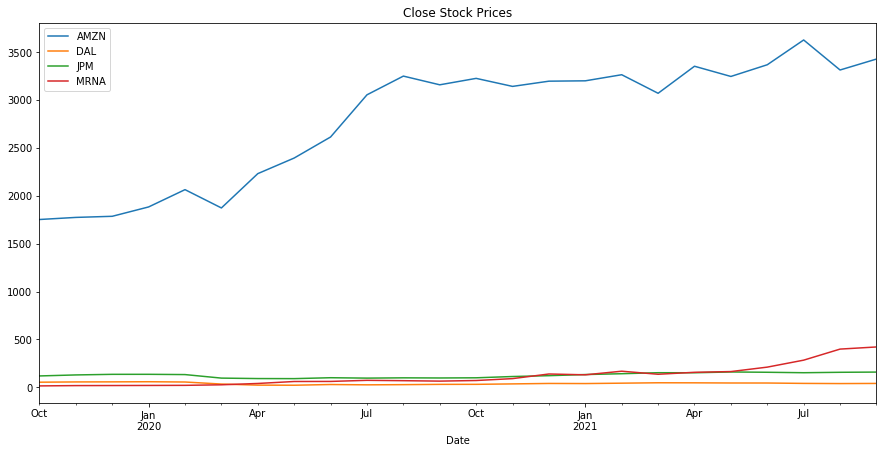

In [31]:
AMZN_stock1["Close"].plot(label="AMZN",figsize = (15,7))
DAL_stock1["Close"].plot(label="DAL")
JPM_stock1["Close"].plot(label="JPM")
MRNA_stock1["Close"].plot(label="MRNA")
plt.title("Close Stock Prices")
plt.legend()

Looking at the min,max,mean and median of the Monthly averages of Open Stocks.

In [32]:
#function that computes various stats
def compute_monthly_stats(col_name):
    rows = []
    for stock in stock_names:
        row = {"Stock": stock_names[stock]}
        row["Min"] = df_stocks[stock][col_name].resample("M").mean().min()
        row["Max"] = df_stocks[stock][col_name].resample("M").mean().max()
        row["Mean"] = df_stocks[stock][col_name].resample("M").mean().mean()
        row["Median"] = df_stocks[stock][col_name].resample("M").mean().median()
        rows.append(row)
    return pd.DataFrame(rows).set_index("Stock")

In [33]:
monthly_open_stats = compute_monthly_stats("Open")
monthly_open_stats

,Min,Max,Mean,Median
Stock,,,,
AMZN,1749.14,3622.81,2803.78,3160.58
DAL,22.65,59.03,41.05,41.10
JPM,91.74,160.58,126.57,131.94
MRNA,15.43,420.78,119.15,72.71


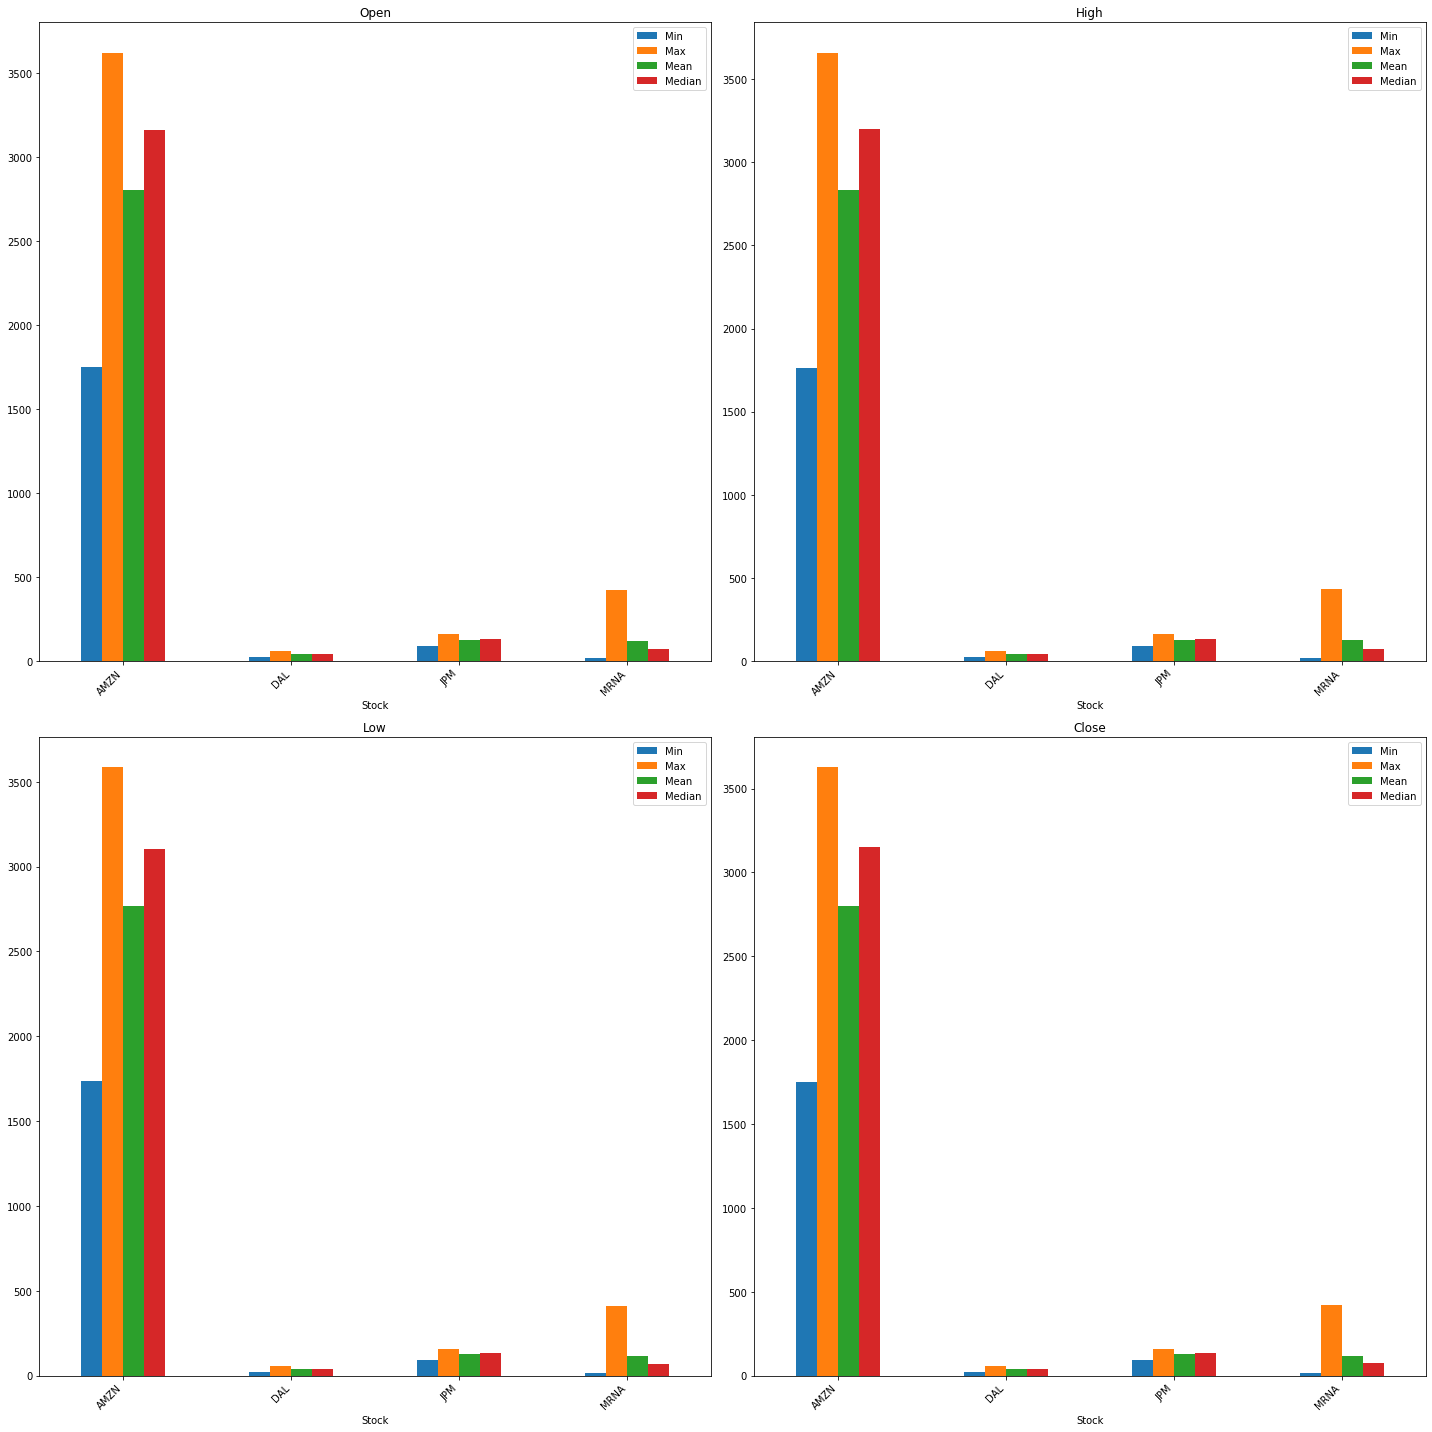

In [34]:
fig = plt.figure(figsize=(20,20))
for i,col in enumerate(columns):
    axc = fig.add_subplot(2,2,i+1)
    ax = compute_monthly_stats(col).plot.bar(ax=axc)
    ax.set_title("%s"%col)
    plt.xticks(rotation=45,ha="right")
fig.tight_layout()

We see once again that Amazon's monthly stock prices are substantially larger than the other company stocks.

This is to be expected due to the signficant difference in daily stock prices between Amazon and the other companies.

##### Scatter Plot Matrix and Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174F419A588>,
      dtype=object)

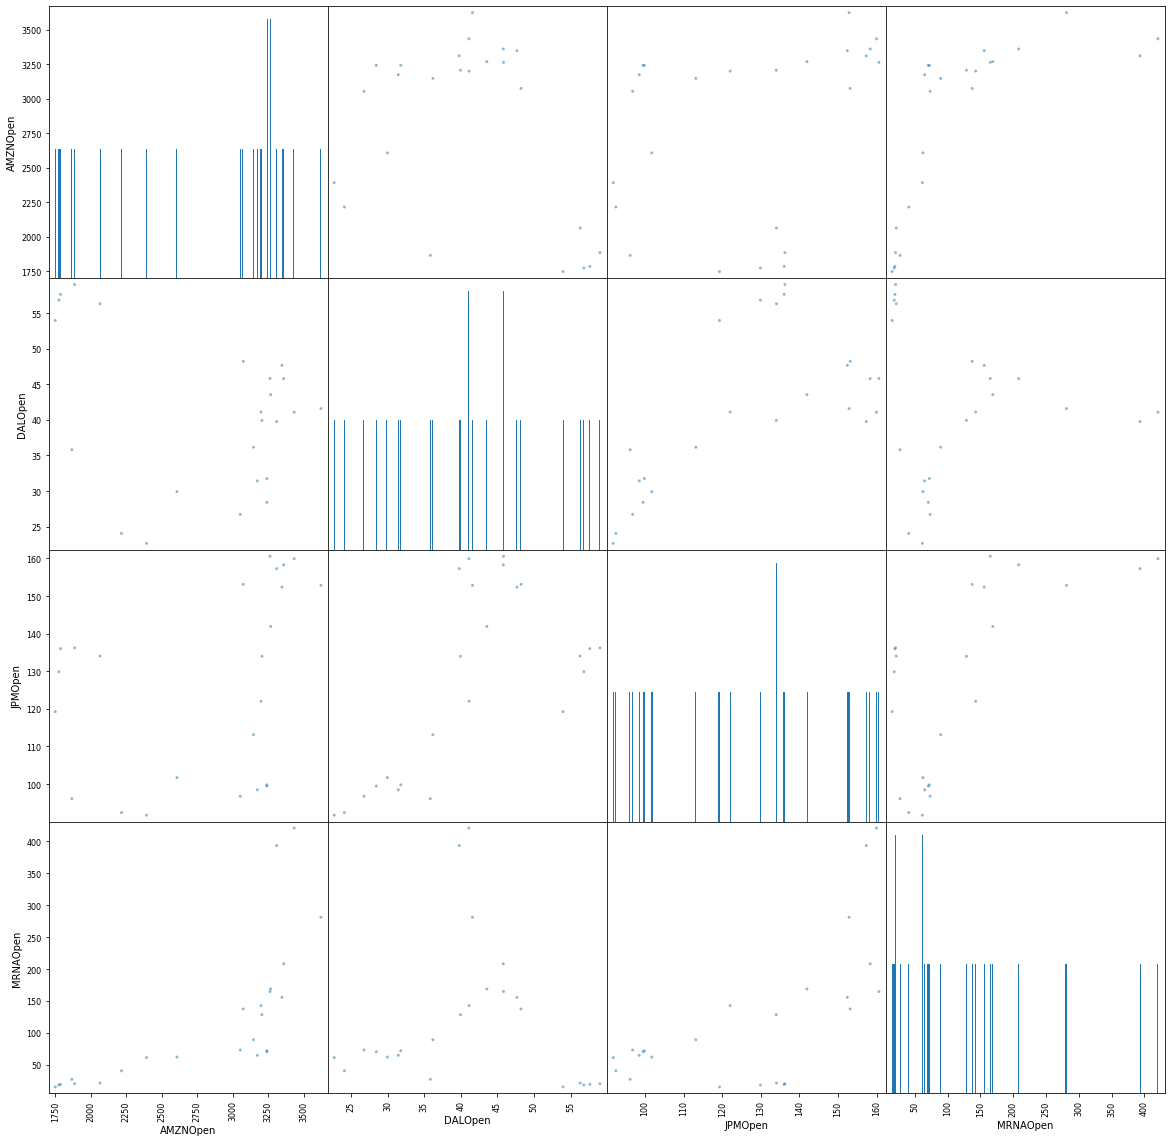

In [35]:
monthly_data = pd.concat([AMZN_stock1["Open"],DAL_stock1["Open"],JPM_stock1["Open"],MRNA_stock1["Open"]],axis=1)
monthly_data.columns = ['AMZNOpen','DALOpen','JPMOpen','MRNAOpen']
scatter_matrix(monthly_data, figsize = (20,20), hist_kwds= {'bins':250})

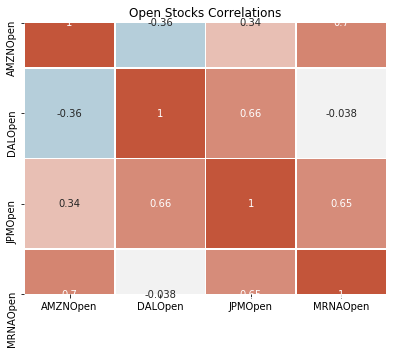

In [36]:
plot_heatmap("Open Stocks Correlations", monthly_data)

The Monthly Averages show much greater correlation between the stocks. This may be due to the stocks being less volatile after being grouped into monthly averages.

Still see that there seems to be some correlation between the stocks JPM and DAL.

##### Volatility of Stocks

Let's look at how volatile the stocks are when grouped on a mothly basis by calculating the returns.

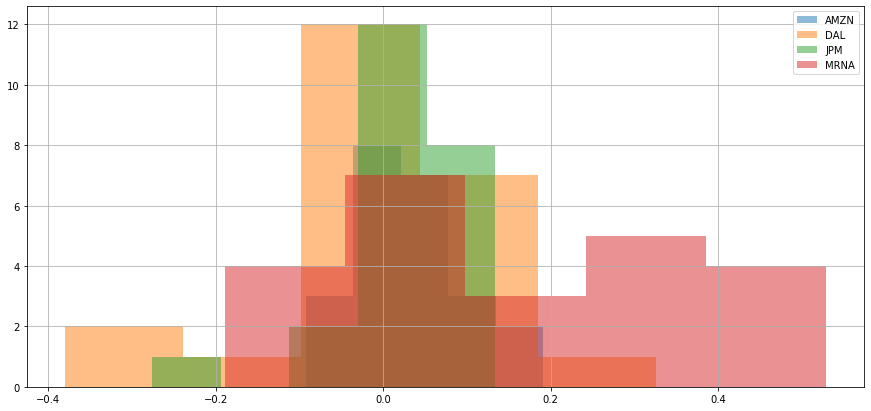

In [37]:
AMZN_stock1['returns'] = (AMZN_stock1['Close']/AMZN_stock1['Close'].shift(1)) -1
DAL_stock1['returns'] = (DAL_stock1['Close']/DAL_stock1['Close'].shift(1))-1
JPM_stock1['returns'] = (JPM_stock1['Close']/JPM_stock1['Close'].shift(1)) - 1
MRNA_stock1['returns'] = (MRNA_stock1['Close']/MRNA_stock1['Close'].shift(1)) - 1
AMZN_stock1['returns'].hist(bins = 5, label = 'AMZN', alpha = 0.5, figsize = (15,7))
DAL_stock1['returns'].hist(bins = 5, label = 'DAL', alpha = 0.5)
JPM_stock1['returns'].hist(bins = 5, label = 'JPM', alpha = 0.5)
MRNA_stock1['returns'].hist(bins = 5, label = 'MRNA', alpha = 0.5)
plt.legend()

Looking at the volatility of stocks based on there monthly averages, wee see the the 2 stocks that look most volatile are MRNA(same as daily) and now DAL.

These 2 stocks look the most volatile and wouldn't be recommended for short term traders.

#### Quarterly Stocks Analysis

Finally, we will look at the quarterly representations of the Stocks of the various companies.

In [38]:
#to be used when we want to reference a specific stock later on
AMZN_stock2 = df_stocks[0].resample("Q").mean()
DAL_stock2 = df_stocks[1].resample("Q").mean()
JPM_stock2 = df_stocks[2].resample("Q").mean()
MRNA_stock2 = df_stocks[3].resample("Q").mean()

In [39]:
AMZN_stock2

,Open,High,Low,Close,returns
Date,,,,,
2019-12-31,1769.47,1781.15,1757.56,1770.16,1.04e-03
2020-03-31,1933.78,1963.12,1907.09,1935.09,1.26e-03
2020-06-30,2409.11,2444.14,2380.23,2416.44,5.74e-03
2020-09-30,3154.78,3201.35,3099.86,3152.27,2.38e-03
2020-12-31,3197.79,3230.26,3151.60,3189.31,7.25e-04
2021-03-31,3176.14,3210.43,3137.13,3170.78,-7.07e-04
2021-06-30,3325.27,3354.13,3295.57,3323.76,1.77e-03
2021-09-30,3453.49,3481.99,3420.96,3453.25,-6.31e-04


Let's look at Amazon Stock based on the quarterly basis.

Text(0.5, 0, 'Date')

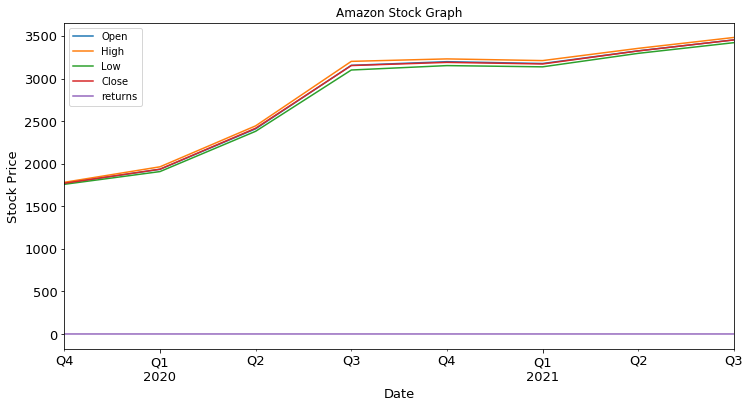

In [40]:
ax=AMZN_stock2.plot(figsize=(12,6),fontsize=fontsize,title="Amazon Stock Graph",xlim =["2019-10-01","2021-09-30"])
ax.set_ylabel("Stock Price",fontsize=fontsize)
ax.set_xlabel("Date",fontsize=fontsize)

We see an even smoother look to the graphs now comapared to the daily and monthly frequencies with the stock showing less peaks and trougs, representing less volatility in the stock.

We can also still see the gradual increase in stock prices of Amazon over each quarter.

Let's compare with the other stocks after being regrouped into quarters.

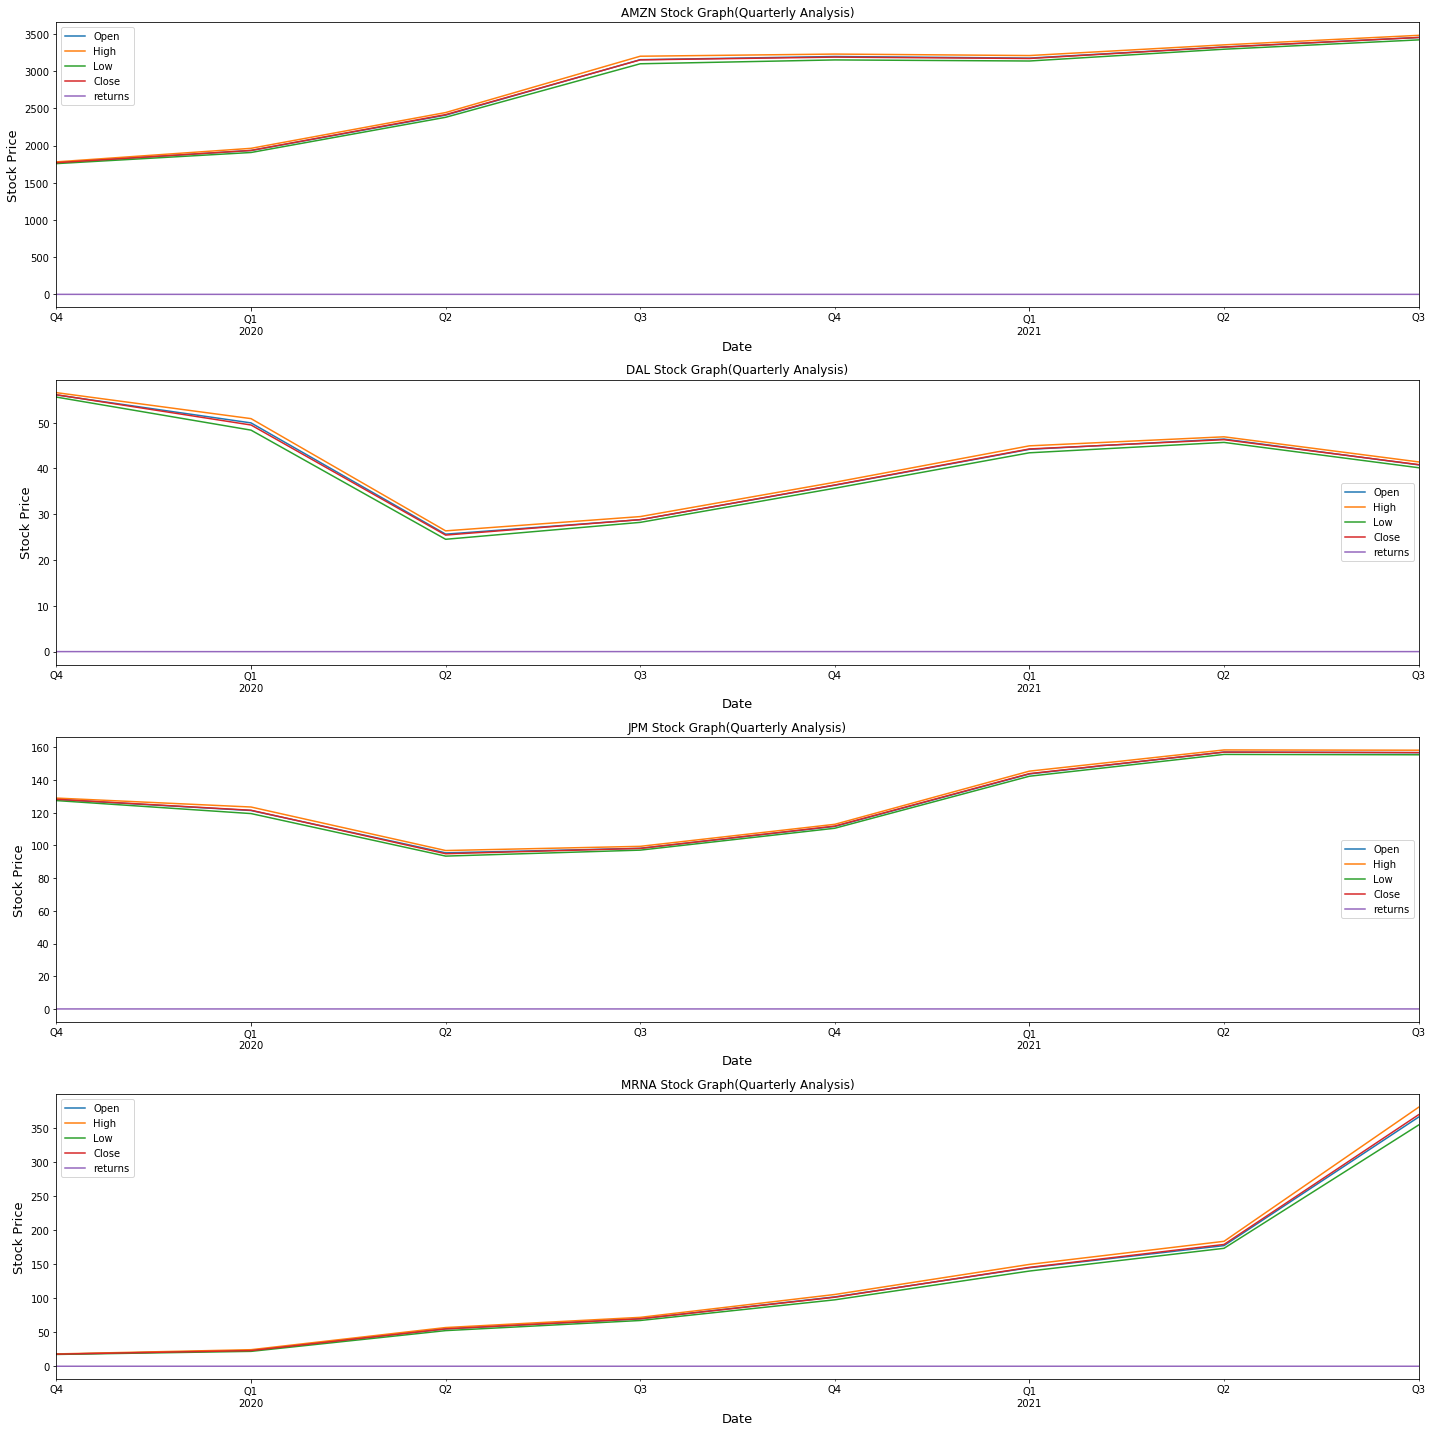

In [41]:
fig = plt.figure(figsize=(20,20))
for i, stock in enumerate(stock_names):
    axc = fig.add_subplot(4, 1, i+1)
    ax = df_stocks[stock].resample("Q").mean().plot(ax=axc)
    ax.set_title("%s Stock Graph(Quarterly Analysis)" % stock_names[stock])
    ax.set_ylabel("Stock Price",fontsize=fontsize)
    ax.set_xlabel("Date",fontsize=fontsize)
    # note that we will use consistent Y-axis limits based on the ranges we computed above
    #ax.set_ylim(0, df_open_stats["Max"].max()+2)
    ax.set_xlim(["2019-10-01","2021-09-30"])
    # change the format of the dates on the x-axis 
# fix the spacing between plots
fig.tight_layout()

Looking at the trends are the same as our daily and monthly analysis respectively. The graphs here however are a lot smoother showing less dips in the graphical trends.

We still see the same trends in the DAL,JPM and MRNA stocks as our previous analysis.

Now we'll look at how the quarterly averages of Open,High,Low and Close compare for each company.

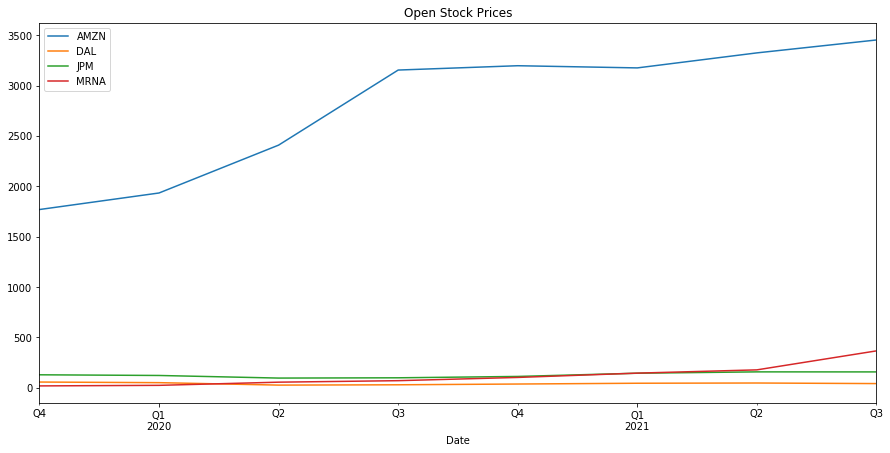

In [42]:
AMZN_stock2["Open"].plot(label="AMZN",figsize = (15,7))
DAL_stock2["Open"].plot(label="DAL")
JPM_stock2["Open"].plot(label="JPM")
MRNA_stock2["Open"].plot(label="MRNA")
plt.title("Open Stock Prices")
plt.legend()

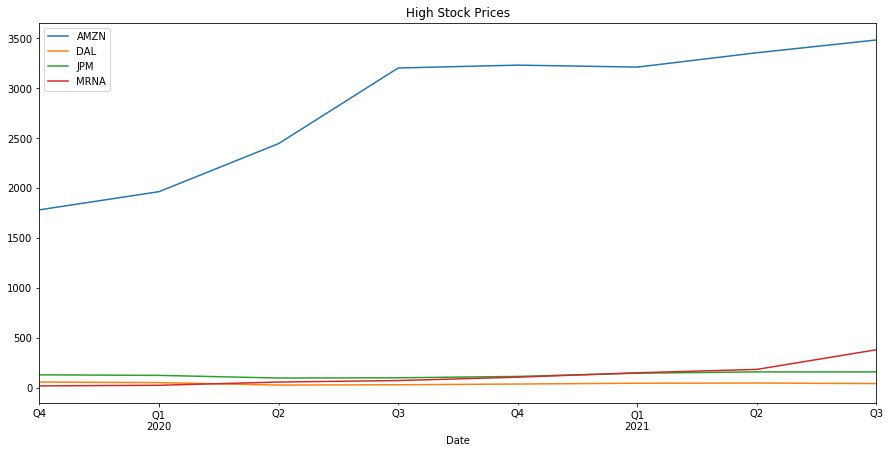

In [43]:
AMZN_stock2["High"].plot(label="AMZN",figsize = (15,7))
DAL_stock2["High"].plot(label="DAL")
JPM_stock2["High"].plot(label="JPM")
MRNA_stock2["High"].plot(label="MRNA")
plt.title("High Stock Prices")
plt.legend()

In [ ]:
AMZN_stock1["Low"].plot(label="AMZN",figsize = (15,7))
DAL_stock1["Low"].plot(label="DAL")
JPM_stock1["Low"].plot(label="JPM")
MRNA_stock1["Low"].plot(label="MRNA")
plt.title("Low Stock Prices")
plt.legend()

In [ ]:
AMZN_stock2["Close"].plot(label="AMZN",figsize = (15,7))
DAL_stock2["Close"].plot(label="DAL")
JPM_stock2["Close"].plot(label="JPM")
MRNA_stock2["Close"].plot(label="MRNA")
plt.title("Close Stock Prices")
plt.legend()

Now we look at the min,max,mean and median of the Quarterly Open Stocks.

In [ ]:
#function that computes various stats
def compute_quarterly_stats(col_name):
    rows = []
    for stock in stock_names:
        row = {"Stock": stock_names[stock]}
        row["Min"] = df_stocks[stock][col_name].resample("Q").mean().min()
        row["Max"] = df_stocks[stock][col_name].resample("Q").mean().max()
        row["Mean"] = df_stocks[stock][col_name].resample("Q").mean().mean()
        row["Median"] = df_stocks[stock][col_name].resample("Q").mean().median()
        rows.append(row)
    return pd.DataFrame(rows).set_index("Stock")

In [ ]:
quarterly_open_stats = compute_quarterly_stats("Open")
quarterly_open_stats

In [ ]:
fig = plt.figure(figsize=(20,20))
for i,col in enumerate(columns):
    axc = fig.add_subplot(2,2,i+1)
    ax = compute_quarterly_stats(col).plot.bar(ax=axc)
    ax.set_title("%s"%col)
    plt.xticks(rotation=45,ha="right")
fig.tight_layout()

We still see that Amazon is greatly different to the other company stocks.

###### Scatter Plot matrix and Correlation

We will look at the correlation for the quarterly frequencies of the Stocks.

In [ ]:
quarterly_data = pd.concat([AMZN_stock2["Open"],DAL_stock2["Open"],JPM_stock2["Open"],MRNA_stock2["Open"]],axis=1)
quarterly_data.columns = ['AMZNOpen','DALOpen','JPMOpen','MRNAOpen']
scatter_matrix(quarterly_data, figsize = (20,20), hist_kwds= {'bins':250})

In [ ]:
plot_heatmap("Open Stocks Correlations", quarterly_data)

The quarterly scatter matrix is a lot more difficult to interpret but we see once again with the heatmap that there seems to be a correlation in the DAL and JPM stocks.

This correlation shows that they were affected similarly over the quarters. This is once again most likely due to the COVID-19 Pandemic.

##### Volatility of Quarterly Stocks

We will now look at the volatility of the quarterly stocks by calculating returns.

In [ ]:
AMZN_stock2['returns'] = (AMZN_stock2['Close']/AMZN_stock2['Close'].shift(1)) -1
DAL_stock2['returns'] = (DAL_stock2['Close']/DAL_stock2['Close'].shift(1))-1
JPM_stock2['returns'] = (JPM_stock2['Close']/JPM_stock2['Close'].shift(1)) - 1
MRNA_stock2['returns'] = (MRNA_stock2['Close']/MRNA_stock2['Close'].shift(1)) - 1
AMZN_stock2['returns'].hist(bins = 3, label = 'AMZN', alpha = 0.5, figsize = (15,7))
DAL_stock2['returns'].hist(bins = 3, label = 'DAL', alpha = 0.5)
JPM_stock2['returns'].hist(bins = 3, label = 'JPM', alpha = 0.5)
MRNA_stock2['returns'].hist(bins = 3, label = 'MRNA', alpha = 0.5)
plt.legend()

By analysis the volatility of the quarterly stocks we see again that Moderna is the most volatile stock over the time frame given.

This could be due to it's dramatic rise over this time period due to COVID-19 vaccine creations.
A volatile stock like this would not be recommeneded for short term traders.

###### Rolling Average
Let's look at a 3-day rolling average for the company stocks and compare them. Let's look at it based on their monthly breakdowns.

In [ ]:
AMZN_stock1["Close"].rolling(3).mean().plot(label="AMZN",figsize = (15,7))
DAL_stock1["Close"].rolling(3).mean().plot(label="DAL")
JPM_stock1["Close"].rolling(3).mean().plot(label="JPM")
MRNA_stock1["Close"].rolling(3).mean().plot(label="MRNA")
plt.title("3-Day Rolling average of monthly stocks")
plt.legend()

In [ ]:
AMZN_stock["Close"].rolling(3).mean().plot(label="AMZN",figsize = (15,7))
DAL_stock["Close"].rolling(3).mean().plot(label="DAL")
JPM_stock["Close"].rolling(3).mean().plot(label="JPM")
MRNA_stock["Close"].rolling(3).mean().plot(label="MRNA")
plt.title("3-Day Rolling average of Daily stocks")
plt.legend()

We see that the daily rolling averages over 3 days are a lot less smooth than the monthly rolling averages. This woould be expected as mmonthly averages are expected to show a lot less volatility. 

## Conclusion

In this assignment, we collected the recent stocks of 4 companies JPMorgan Chase,Moderna Inc.,Delta Air Lines and Amazon.com Inc. We characterised and visualised each time series by daily, monthly and quarterly intervals. We saw that Amazon's stocks were significantly greater in price than the other stocks and as expected was least similar to the other stocks analysed.

We saw similarities in the trends of JPMorgan and Delta Air Lines. We could say that these companies both in the aviation and financial sectors repectively were afftected in similar manners by the COVID-19 Pandemic. In contrast, we see that Moderna, a pharamaceutical company was affected in an opposite manner with a dramatic increase in its stock prices. It's assumed that this rise is a result of the COVID-19 Pandemic and the creation of their Vaccine.

This rise in Moderna stocks made it the most volatile out of all the stocks and would not be recommended for short term traders.

##### Further Analysis:

. We could add some for of prediction model for the stocks that would aim to forcast trends based on the given time series.